# Classifiez automatiquement des biens de consommation - PLACE DE MARCHE
# Notebook 2 - FAISABILITE - IMAGE
# Fonctions permettant le prétraitement et la feature extraction des données textes et images ainsi que les résultats de l’étude de faisabilité (graphiques, mesure de similarité) 

# <a name="C0">SOMMAIRE</a>

## Travail préparatoire
### <a href="#C1">1. Set up Environnement</a>
### <a href="#C2">2. Travail sur les images</a>
### <a href="#C3">3. Faisabilité via model préentrainé</a>
### <a href="#C4">4. Méthode traditionnelle</a>


Les données
https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Textimage+DAS+V2/Dataset+projet+pre%CC%81traitement+textes+images.zip

Notebook d'exemple pour la faisabilité : 
https://s3.eu-west-1.amazonaws.com/course.oc-static.com/projects/Data_Scientist_P6/Weather_Images_CNN_Transfer_Learning_Stage_1_feasibility_V1.0.ipynb



### Ce qu'il faut faire :


#### 1) Fonctions de prétraitement et explorations
Un ou des notebooks (ou des fichiers .py) contenant les fonctions permettant le prétraitement et la feature extraction des données textes et images ainsi que les résultats de l’étude de faisabilité (graphiques, mesure de similarité) 


#### 2) Un notebook de classification supervisée des images
Un notebook (ou code commenté au choix) d’essais des différentes approches de modélisation (non cleané, pour comprendre votre démarche).

#### 3)Un script Python (notebook ou fichier .py) de test de l’API et le fichier au format “csv” contenant les produits extraits
Un notebook de simulation pour déterminer la fréquence nécessaire de mise à jour du modèle de segmentation.

#### 4) Présentation
Un support de présentation détaillant le travail réalisé



### Concernant la propriété intélectuelle =>  à mettre dans la présentation 
Mail de Linda, Lead Data Scientist
"PS : J’ai bien vérifié qu’il n’y avait aucune contrainte de propriété intellectuelle sur les données et les images."


# - - - - - - - TRAVAIL PREPARATOIRE - - - - - - - -

# <a name="C1">1. Set up environnement</a>
<a href="#C0">SOMMAIRE</a>

In [1]:
#Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import isnan
import scipy.stats
%matplotlib inline

#Réglages d'affichage
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 2000)

# Rappel du thème utilisé
sns.set_style('darkgrid')
sns.set_palette('Set2')


import os
from os import listdir
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
from glob import glob

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout 
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

# os.environ["TF_KERAS"]='1'
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU'))) 

Num GPUs Available:  0


In [2]:
#Import des données
flipkart_df = pd.read_csv('C:/Users/Me/Documents/1- DATA SCIENCE/Projet 6/source/flipkart_com-ecommerce_sample_1050.csv')

# <a name="C2">2. Travail sur les images</a>
<a href="#C0">SOMMAIRE</a>

In [3]:
flipkart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [4]:
flipkart_df.head(1)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"[""Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...""]",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunlight.,Specifications of Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) General Brand Elegance Designed For Door Type Eyelet Model Name Abstract Polyester Door Curtain Set Of 2 Model ID Duster25 Color Multicolor Dimensions Length 213 cm In the Box Number of Contents in Sales Package Pack of 2 Sales Package 2 Curtains Body & Design Material Polyester",No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""value""=>""Elegance""}, {""key""=>""Designed For"", ""value""=>""Door""}, {""key""=>""Type"", ""value""=>""Eyelet""}, {""key""=>""Model Name"", ""value""=>""Abstract Polyester Door Curtain Set Of 2""}, {""key""=>""Model ID"", ""value""=>""Duster25""}, {""key""=>""Color"", ""value""=>""Multicolor""}, {""key""=>""Length"", ""value""=>""213 cm""}, {""key""=>""Number of Contents in Sales Package"", ""value""=>""Pack of 2""}, {""key""=>""Sales Package"", ""value""=>""2 Curtains""}, {""key""=>""Material"", ""value""=>""Polyester""}]}"


In [5]:
#création d'une copie pour pouvoir revenir au fichier initial si besoin
df=flipkart_df.copy()
df=df[['product_name','product_category_tree','image']]
#on isole la catégorie en créant une nouvelle variable
df['category']=(df.product_category_tree.str[2:-2].str.split(' >> ')).map(lambda x: x[0])
df.category.unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

In [6]:
df.category = df.category.str.replace(' ', '_')
df.category = df.category.str.replace('&', 'and')
df['category'].value_counts()

Home_Furnishing                 150
Baby_Care                       150
Watches                         150
Home_Decor_and_Festive_Needs    150
Kitchen_and_Dining              150
Beauty_and_Personal_Care        150
Computers                       150
Name: category, dtype: int64

In [7]:
df.drop('product_category_tree',axis=1,inplace=True)

In [8]:
path = "C:/Users/Me/Documents/1- DATA SCIENCE/Projet 6/source/Images/"
df['image_path']=df.image.apply(lambda x : str(path+x))
df

,product_name,image,category,image_path
0,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home_Furnishing,C:/Users/Me/Documents/1- DATA SCIENCE/Projet 6/source/Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby_Care,C:/Users/Me/Documents/1- DATA SCIENCE/Projet 6/source/Images/7b72c92c2f6c40268628ec5f14c6d590.jpg
2,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby_Care,C:/Users/Me/Documents/1- DATA SCIENCE/Projet 6/source/Images/64d5d4a258243731dc7bbb1eef49ad74.jpg
3,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,d4684dcdc759dd9cdf41504698d737d8.jpg,Home_Furnishing,C:/Users/Me/Documents/1- DATA SCIENCE/Projet 6/source/Images/d4684dcdc759dd9cdf41504698d737d8.jpg
4,Jaipur Print Cotton Floral King sized Double Bedsheet,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home_Furnishing,C:/Users/Me/Documents/1- DATA SCIENCE/Projet 6/source/Images/6325b6870c54cd47be6ebfbffa620ec7.jpg
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Baby_Care,C:/Users/Me/Documents/1- DATA SCIENCE/Projet 6/source/Images/958f54f4c46b53c8a0a9b8167d9140bc.jpg
1046,Wallmantra Large Vinyl Sticker Sticker,fd6cbcc22efb6b761bd564c28928483c.jpg,Baby_Care,C:/Users/Me/Documents/1- DATA SCIENCE/Projet 6/source/Images/fd6cbcc22efb6b761bd564c28928483c.jpg
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films (Imported) Sticker,5912e037d12774bb73a2048f35a00009.jpg,Baby_Care,C:/Users/Me/Documents/1- DATA SCIENCE/Projet 6/source/Images/5912e037d12774bb73a2048f35a00009.jpg
1048,Wallmantra Medium Vinyl Sticker Sticker,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Baby_Care,C:/Users/Me/Documents/1- DATA SCIENCE/Projet 6/source/Images/c3edc504d1b4f0ba6224fa53a43a7ad6.jpg


Home_Furnishing


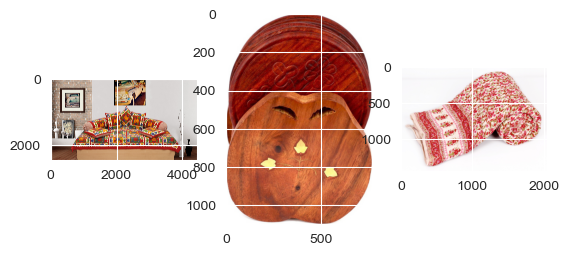

Baby_Care


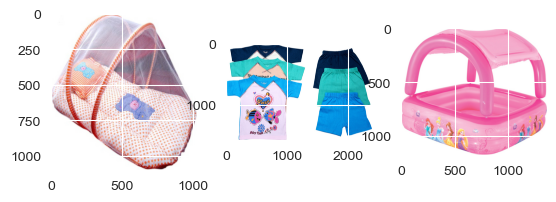

Watches


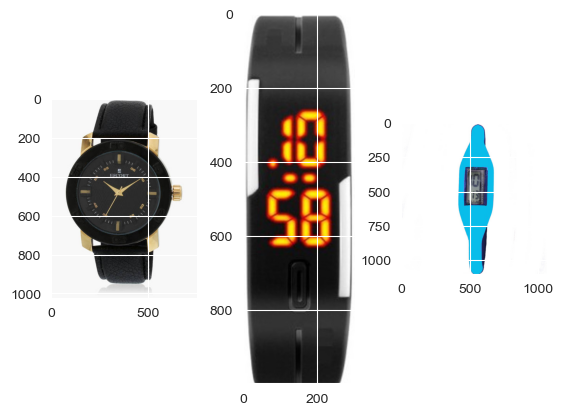

Home_Decor_and_Festive_Needs


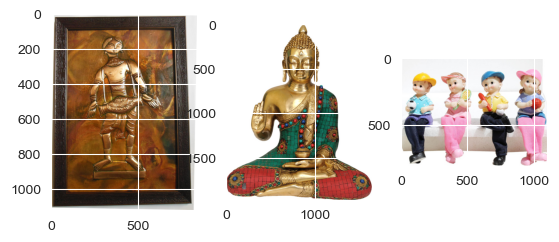

Kitchen_and_Dining


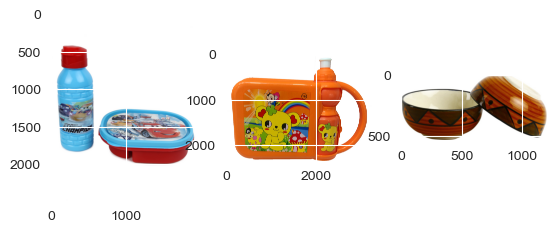

Beauty_and_Personal_Care


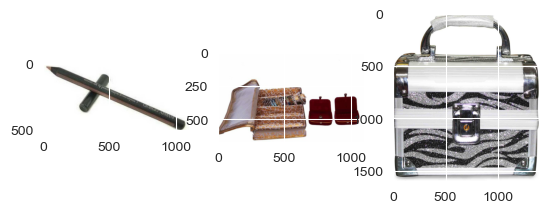

Computers


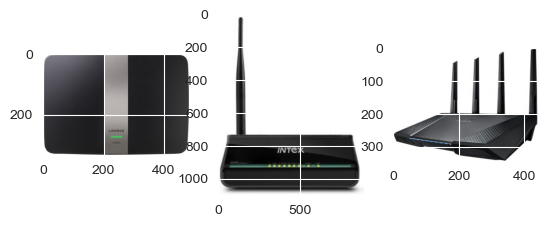

In [9]:
from matplotlib.image import imread

list_labels = df.category.unique()
def list_fct(name) :
    list_image_name = [df["image_path"][i] for i in range(len(df)) if df["category"][i]==name]
    return list_image_name

for label in list_labels :
    list_label=[df["image_path"][i] for i in range(len(df)) if df["category"][i]==label]
    globals()[f'list_{label}'] = list_label
    print(label)
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = list_fct(label)[i+10]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

# <a name="C3">3. Faisabilité ?</a>
<a href="#C0">SOMMAIRE</a>

## Création du modèle pré entrainé

In [10]:
base_model = VGG16()
model = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)

print(model.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## Création des features des images

In [11]:
images_features = []
i=0 
for image_file in df["image_path"] :
    if i%100 == 0 : print(i)
    i +=1
    image = load_img(image_file, target_size=(224, 224))
    image = img_to_array(image) 
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    images_features.append(model.predict(image, verbose=0)[0]) # predict from pretrained model

images_features = np.asarray(images_features)
images_features.shape

0
100
200
300
400
500
600


C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:3035: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


700
800
900
1000


(1050, 4096)

## Réduction dimension et analyse

### Réduction de dimenion PCA

In [12]:
from sklearn import manifold, decomposition

print(images_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(images_features)
print(feat_pca.shape)

(1050, 4096)
(1050, 803)


### Réduction de dimension T-SNE et affichage des images selon vraies classes

In [14]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score as ARI
import time

temps1 = time.time()

#on entraine un TSNE sur le feat_pca
tsne = TSNE(n_components=2,init='random')
T = tsne.fit_transform(feat_pca)

duration1=time.time()-temps1
print("temps de T-SNE : ", "%15.2f" % duration1, "secondes")

temps de T-SNE :             5.69 secondes


L'indice de Rand est de 0.48187.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


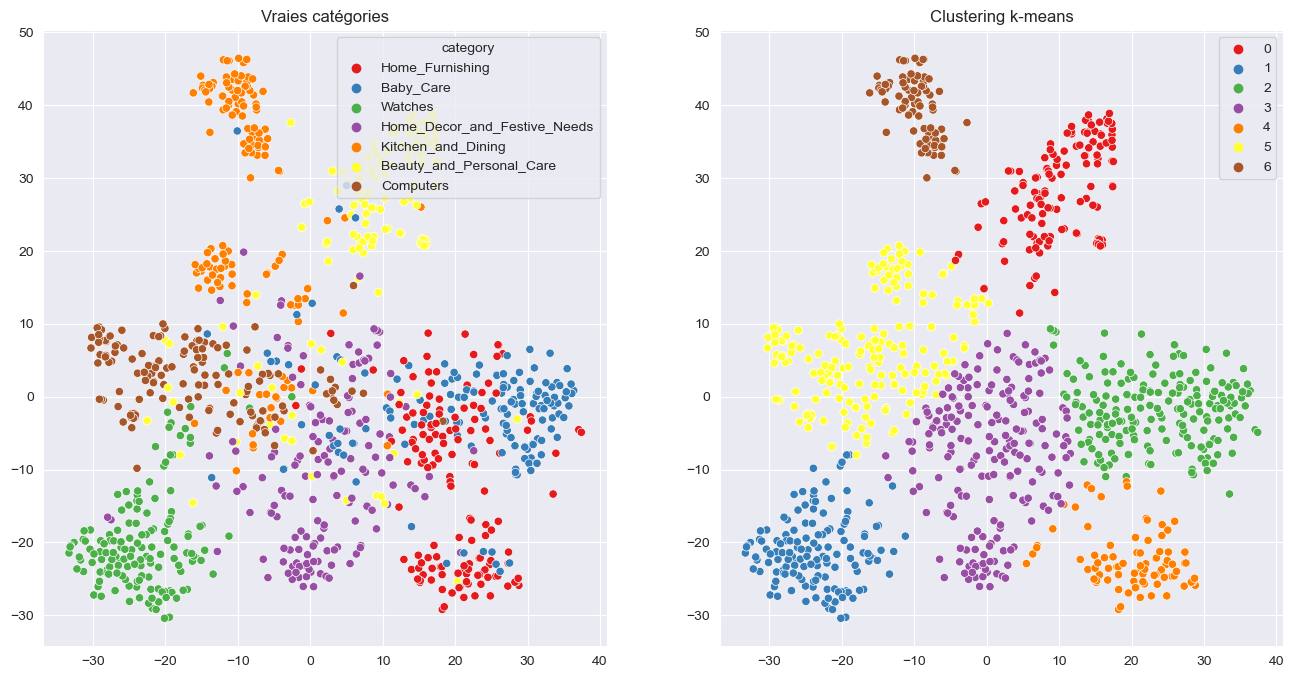

In [15]:
#clustering non supervisé avec un kmeans fixé à 7 clusters sur X, prédictions vs réalité via indice de rand 
Y=df.category
X=T
#on fait le kmeans sur X et on récupère les étiquettes prédites par kmeans
kmeans = KMeans(n_clusters=7, random_state=0, n_init="auto").fit(X)
predictions=kmeans.labels_
    
#score pour comparaison
indice_rand=ARI(Y,predictions)
print("L'indice de Rand est de {}.".format(round(indice_rand,5)))

#on prépare les deux graphiques 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))
    
#on affiche le TSNE avec les vrais étiquettes
ax1.set_title('Vraies catégories')
sns.scatterplot(T[:,0], T[:,1],hue=Y, palette="Set1", ax=ax1)
    
#on affiche le TSNE avec les étiquettes prédites
ax2.set_title('Clustering k-means')
sns.scatterplot(T[:,0], T[:,1],hue=predictions, palette="Set1", ax=ax2)
plt.show()
    

### Exemples d'erreurs

In [18]:
# Analyse d'image "computer" affectées au cluster 5 "Home Decor  & Festive Needs"

list_Computers_0 = [i for i in range(len(df["image_path"])) \
                    if (Y[i] == 'Computers') and (predictions[i] == 5)]
list_Computers_0[0]



47

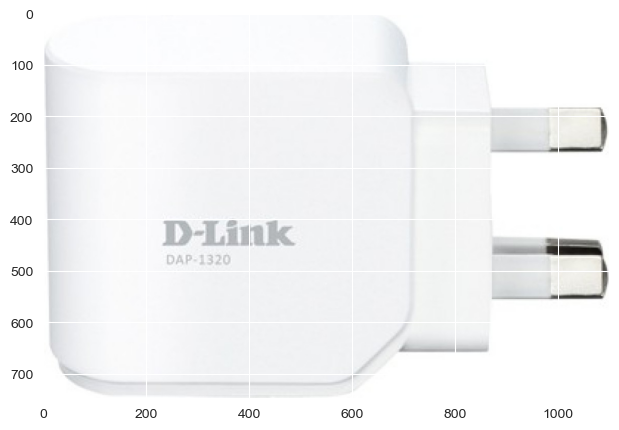

In [19]:
# Affichage d'image "computer" affectées au cluster 5 "Home Decor  & Festive Needs"
id = list_Computers_0[0]
fig = plt.figure(figsize = (8, 5))
filename = df["image_path"][id]
image = imread(filename)
plt.imshow(image)
plt.show()


### Analyse par classes

In [32]:
set(Y)

{'Baby_Care',
 'Beauty_and_Personal_Care',
 'Computers',
 'Home_Decor_and_Festive_Needs',
 'Home_Furnishing',
 'Kitchen_and_Dining',
 'Watches'}

In [31]:
set(predictions)

{0, 1, 2, 3, 4, 5, 6}

In [33]:
etiq_dict = { 0 : 'Beauty_and_Personal_Care',
              1 : 'Watches',
              2 : 'Baby_Care',
              3 : 'Home_Decor_and_Festive_Needs',
              4 : 'Home_Furnishing',
              5 : 'Computers',
              6 : 'Kitchen_and_Dining'}

In [49]:
# Créer une nouvelle liste avec les catégories correspondantes
predic_labels = [etiq_dict[p] for p in predictions]

# Afficher le résultat
predic_labels

['Home_Furnishing',
 'Baby_Care',
 'Baby_Care',
 'Home_Furnishing',
 'Home_Furnishing',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Computers',
 'Watches',
 'Computers',
 'Home_Decor_and_Festive_Needs',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Computers',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Watches',
 'Home_Furnishing',
 'Home_Furnishing',
 'Baby_Care',
 'Computers',
 'Computers',
 'Computers',
 'Baby_Care',
 'Baby_Care',
 'Baby_Care',
 'Baby_Care',
 'Beauty_and_Personal_Care',
 'Kitchen_and_Dining',
 'Kitchen_and_Dining',
 'Kitchen_and_Dining',
 'Computers',
 'Kitchen_and_Dining',
 'Beauty_and_Personal_Care',
 'Kitchen_and_Dining',
 'Home_Decor_and_Festive_Needs',
 'Computers',
 'Computers',
 'Computers',
 'Computers',
 'Watches',
 'Beauty_and_Personal_Care',
 'Beauty_and_Personal_Care',
 'Beauty_and_Personal_Care',
 'Beauty_and_Personal_

In [50]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(Y, predic_labels)
print(conf_mat)

[[110   3   6  22   8   1   0]
 [  4 117  10  16   1   1   1]
 [  1   1 119  28   0   0   1]
 [ 10   1   9 116  10   0   4]
 [ 75   0   0   5  70   0   0]
 [  1   9  45  17   0  78   0]
 [  0   0  11   2   0   0 137]]


In [55]:
print(metrics.classification_report(Y, predic_labels))

                              precision    recall  f1-score   support

                   Baby_Care       0.55      0.73      0.63       150
    Beauty_and_Personal_Care       0.89      0.78      0.83       150
                   Computers       0.59      0.79      0.68       150
Home_Decor_and_Festive_Needs       0.56      0.77      0.65       150
             Home_Furnishing       0.79      0.47      0.59       150
          Kitchen_and_Dining       0.97      0.52      0.68       150
                     Watches       0.96      0.91      0.94       150

                    accuracy                           0.71      1050
                   macro avg       0.76      0.71      0.71      1050
                weighted avg       0.76      0.71      0.71      1050



<AxesSubplot:>

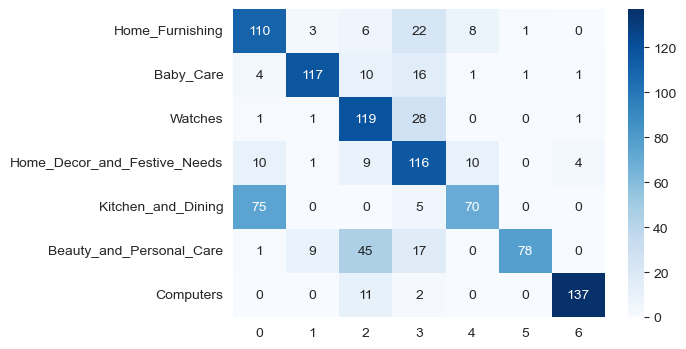

In [58]:

print(conf_mat)
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='d')

# <a name="C4">4. Méthode Traditionnelle</a>
<a href="#C0">SOMMAIRE</a>
- descripteurs d'image SIFT
- créations de clusters de descripteurs
- création histogramme par image
- réduction de dimension PCA puis TSNE
- Analyse visuelle
- Analyse de similarités entre catégories et clusters

## Descripteurs d'images SIFT

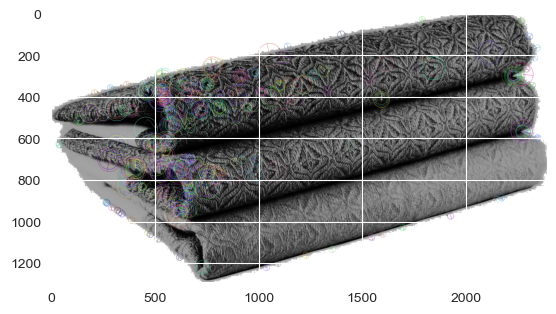

Descripteurs: (500, 32)

[[ 52  63 126 ...  35 166  51]
 [219 207  42 ... 148 184  90]
 [182 231 107 ... 144 246 225]
 ...
 [229 204 210 ... 125 232 142]
 [ 45 236  88 ... 251  72 208]
 [ 75  56 250 ... 133  29 127]]


In [90]:
import cv2
import matplotlib.pyplot as plt

orb = cv2.ORB_create()
image = cv2.imread(df.image_path[1], 0)  # convert to grayscale
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = orb.detectAndCompute(image, None)

# Draw keypoints on the image
img = cv2.drawKeypoints(image, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Convert the image from BGR to RGB for displaying with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image with keypoints
plt.imshow(img_rgb)
plt.show()

print("Descripteurs:", des.shape)
print()
print(des)


## Prétraitement des images via SIFT
### Créations des descripteurs de chaque image

- Pour chaque image passage en gris et equalisation
- création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
- création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs



In [147]:
# identification of key points and associated descriptors
sift_keypoints = []
temps1=time.time()
sift = cv2.ORB_create()

for image_num in range(len(df.image_path)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(df.image_path[image_num],0) # convert in gray
    image = cv2.resize(image, (224, 224))
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    #des = des / np.linalg.norm(des, axis=1, keepdims=True)  # Normalize descriptors
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (391171, 32)
temps de traitement SIFT descriptor :            11.51 secondes


C:\Users\Me\AppData\Local\Temp\ipykernel_2104\2101492944.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sift_keypoints_by_img = np.asarray(sift_keypoints)


### Création des clusters de descripteurs
Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables



In [148]:
from sklearn import cluster

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  625
Création de 625 clusters de descripteurs ...


C:\Users\Me\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


temps de traitement kmeans :             9.95 secondes


### Création des features des images
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

In [149]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             1.39 secondes


### Réduction de dimension via PCA

In [150]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 625)
Dimensions dataset après réduction PCA :  (1050, 518)


### Réduction de dimension via TSNE

In [151]:
tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])

In [152]:
df_tsne["class"] = df.category
print(df_tsne.shape)

(1050, 3)


In [153]:
df_tsne

,tsne1,tsne2,class
0,-8.368722,15.697908,Home_Furnishing
1,-12.783792,15.066918,Baby_Care
2,-12.970984,2.717379,Baby_Care
3,-18.348150,8.372797,Home_Furnishing
4,-4.623024,-2.233890,Home_Furnishing
...,...,...,...
1045,-10.775199,-4.760139,Baby_Care
1046,1.748447,-2.227788,Baby_Care
1047,-5.506445,3.187081,Baby_Care
1048,-4.871649,0.357022,Baby_Care


## Analyse visuelle : affichage T-SNE selon catégories d'images

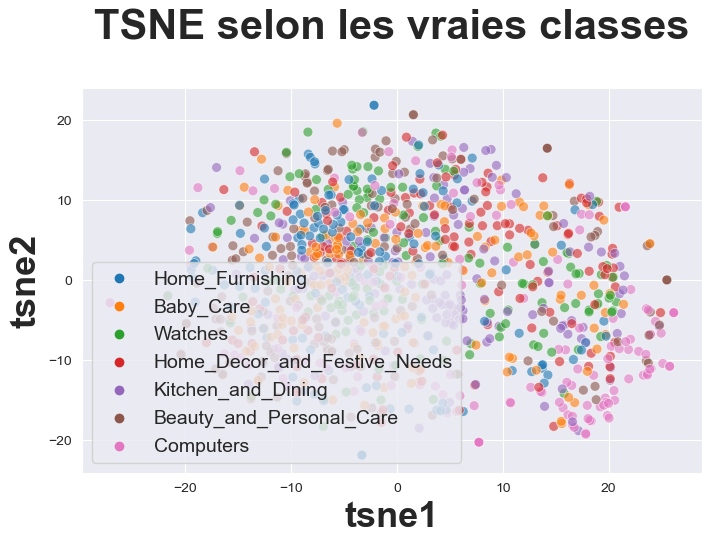

In [154]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


In [155]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)


(1050, 4)


C:\Users\Me\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


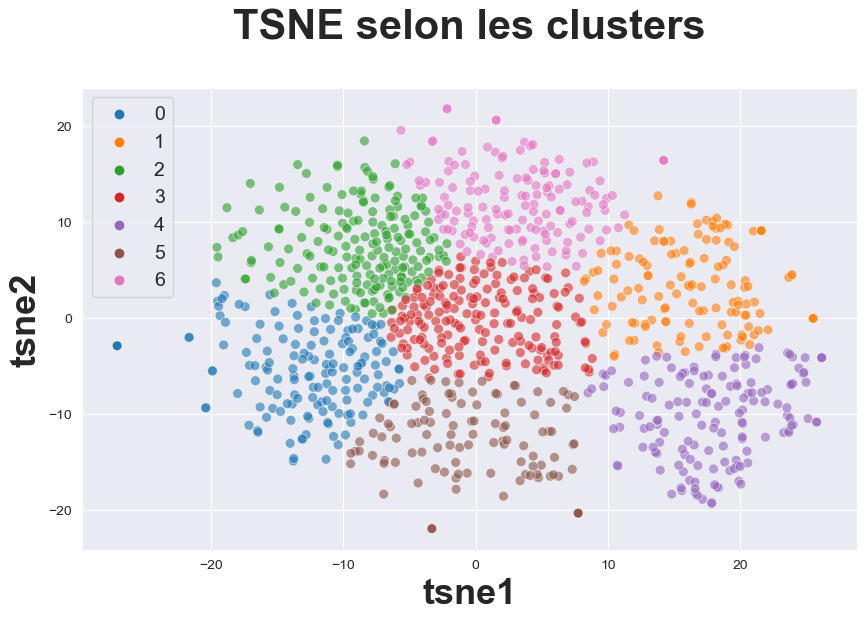

ARI :  0.03250575490417692


In [156]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = df.category
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

## Analyse par classes

In [132]:
df_tsne.groupby("cluster").count()["class"]


cluster
0    203
1    158
2    152
3    134
4    140
5    152
6    111
Name: class, dtype: int64

In [133]:
etiq_dict = { 0 : 'Beauty_and_Personal_Care',
              1 : 'Watches',
              2 : 'Baby_Care',
              3 : 'Home_Decor_and_Festive_Needs',
              4 : 'Home_Furnishing',
              5 : 'Computers',
              6 : 'Kitchen_and_Dining'}
# Créer une nouvelle liste avec les catégories correspondantes
predic_labels = [etiq_dict[p] for p in df_tsne["cluster"]]

# Afficher le résultat
predic_labels

['Computers',
 'Computers',
 'Kitchen_and_Dining',
 'Computers',
 'Baby_Care',
 'Computers',
 'Baby_Care',
 'Computers',
 'Computers',
 'Computers',
 'Home_Decor_and_Festive_Needs',
 'Baby_Care',
 'Watches',
 'Kitchen_and_Dining',
 'Kitchen_and_Dining',
 'Beauty_and_Personal_Care',
 'Watches',
 'Beauty_and_Personal_Care',
 'Baby_Care',
 'Baby_Care',
 'Computers',
 'Home_Decor_and_Festive_Needs',
 'Watches',
 'Computers',
 'Kitchen_and_Dining',
 'Computers',
 'Home_Decor_and_Festive_Needs',
 'Home_Decor_and_Festive_Needs',
 'Watches',
 'Computers',
 'Beauty_and_Personal_Care',
 'Home_Furnishing',
 'Watches',
 'Watches',
 'Baby_Care',
 'Beauty_and_Personal_Care',
 'Home_Decor_and_Festive_Needs',
 'Beauty_and_Personal_Care',
 'Beauty_and_Personal_Care',
 'Watches',
 'Watches',
 'Baby_Care',
 'Home_Furnishing',
 'Watches',
 'Beauty_and_Personal_Care',
 'Home_Decor_and_Festive_Needs',
 'Beauty_and_Personal_Care',
 'Baby_Care',
 'Computers',
 'Baby_Care',
 'Home_Decor_and_Festive_Needs',
 'H

                              precision    recall  f1-score   support

                   Baby_Care       0.17      0.17      0.17       150
    Beauty_and_Personal_Care       0.10      0.14      0.12       150
                   Computers       0.05      0.05      0.05       150
Home_Decor_and_Festive_Needs       0.22      0.20      0.21       150
             Home_Furnishing       0.12      0.11      0.12       150
          Kitchen_and_Dining       0.09      0.07      0.08       150
                     Watches       0.16      0.17      0.16       150

                    accuracy                           0.13      1050
                   macro avg       0.13      0.13      0.13      1050
                weighted avg       0.13      0.13      0.13      1050

[[26 21 15 12 18 29 29]
 [13 21 39 16  6 11 44]
 [16 33  8 16 59  8 10]
 [25 49 20 30  7  7 12]
 [46 13 27  9 17 21 17]
 [12 51  9 28 19 10 21]
 [14 15 34 23 14 25 25]]


<AxesSubplot:>

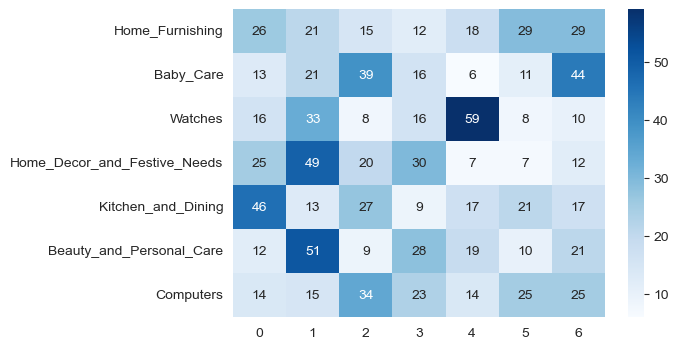

In [135]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(Y, predic_labels)
print(metrics.classification_report(Y, predic_labels))

print(conf_mat)
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='d')